In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cv2.__version__

'3.4.2'

In [3]:
def display(pic,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    myplot = fig.add_subplot(111)
    myplot.imshow(pic,cmap='gray')

In [4]:
tile = cv2.imread('Cristiano_RonaldoFile.jpg',0)

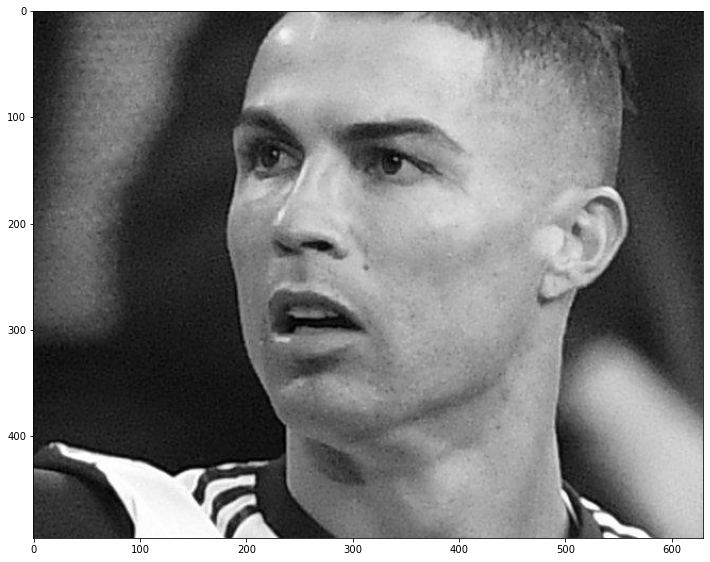

In [5]:
display(tile)

In [6]:
cr7 = cv2.imread('Cristiano_Ronaldo.jpg',0)

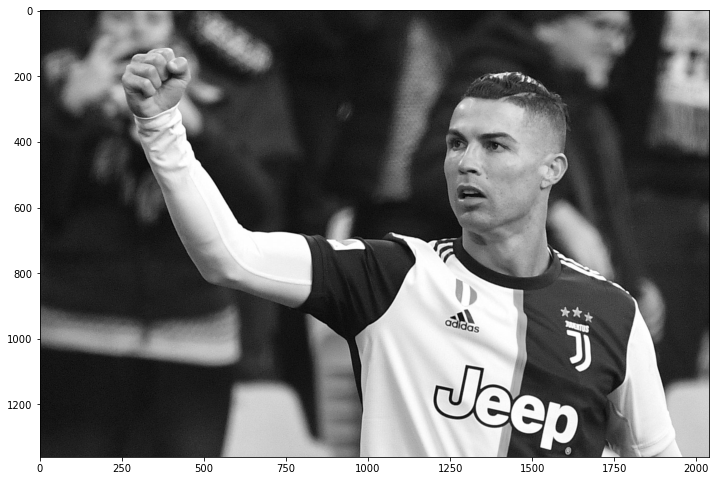

In [7]:
display(cr7)

In [8]:
orb = cv2.ORB_create()
kp1,des1 = orb.detectAndCompute(tile,None)
kp2,des2 = orb.detectAndCompute(cr7,None)

In [9]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [10]:
matches = bf.match(des1,des2)

In [11]:
matches = sorted(matches,key=lambda x:x.distance)

In [12]:
floor_matches = cv2.drawMatches(tile,kp1,cr7,kp2,matches[:50],None,flags=2)

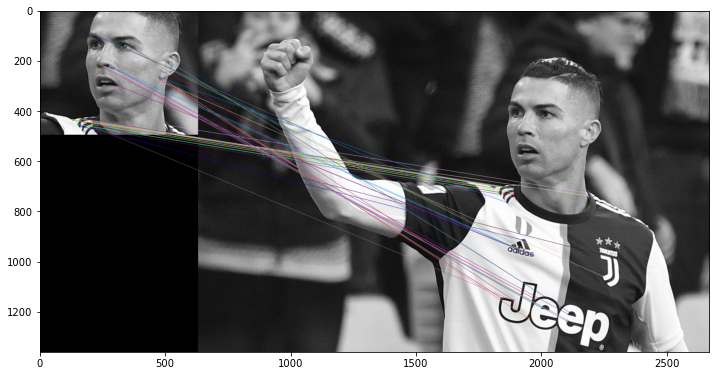

In [13]:
display(floor_matches)

In [14]:
sift = cv2.xfeatures2d.SIFT_create()

In [15]:
kp1,des1 = sift.detectAndCompute(tile,None)
kp2,des2 = sift.detectAndCompute(cr7,None)

In [16]:
bf = cv2.BFMatcher()

In [17]:
matches = bf.knnMatch(des1,des2,k=2)

In [18]:
good = []
for match1,match2 in matches:
    if match1.distance < 1.2*match2.distance:
        good.append([match1])

In [21]:
draw_params = dict(matchColor=(0,0,255),singlePointColor=(0,0,255))
sift_matches = cv2.drawMatchesKnn(tile,kp1,cr7,kp2,good,None,**draw_params)

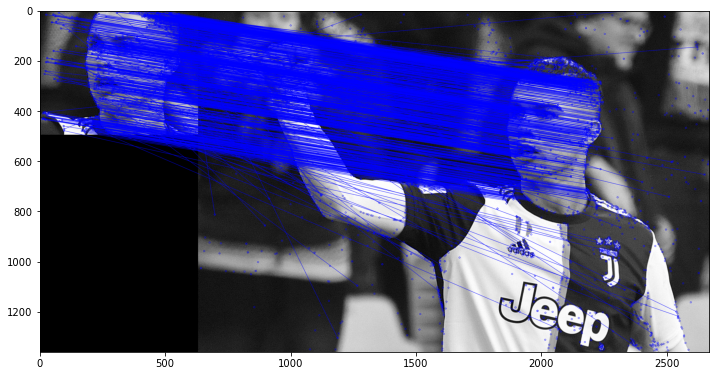

In [23]:
display(sift_matches)

In [24]:
sift = cv2.xfeatures2d.SIFT_create()

In [26]:
kp1,des1 = sift.detectAndCompute(tile,None)
kp2,des2 = sift.detectAndCompute(cr7,None)

In [27]:
flann_index_kdtree=0
index_params = dict(algorithm = flann_index_kdtree,trees=7)
search_params = dict(checks=50)

In [28]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [29]:
matches = flann.knnMatch(des1,des2,k=2)

In [30]:
matchesMask = [[0,0] for i in range(len(matches))]

In [31]:
for i,(match1,match2) in enumerate(matches):
    if match1.distance <1.2*match2.distance:
        matchesMask[i]=[1,0]

In [32]:
draw_params = dict(matchColor=(255,0,0),singlePointColor=(0,0,255),matchesMask=matchesMask,flags=2)

In [34]:
flann_matches = cv2.drawMatchesKnn(tile,kp1,cr7,kp2,matches,None,**draw_params)

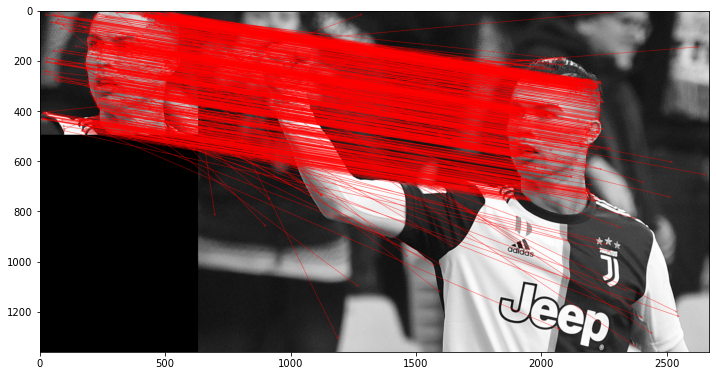

In [35]:
display(flann_matches)